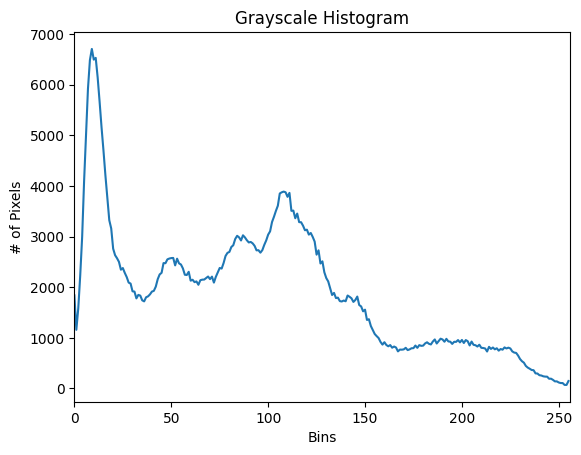

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('SAMPLE.jpg', 0)  # Read as grayscale

# Compute histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

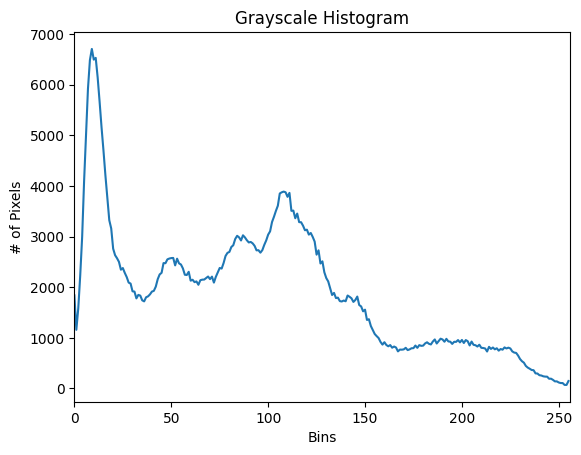

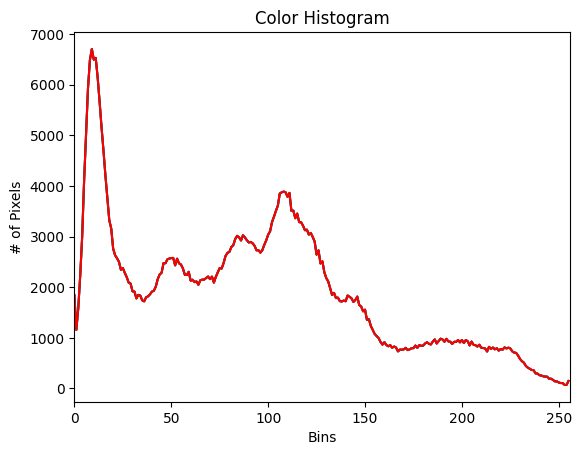

In [3]:
# Read the image
image = cv2.imread('SAMPLE.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute histogram for grayscale image
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_gray)
plt.xlim([0, 256])
plt.show()

# Compute histogram for each channel in the color image
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.show()

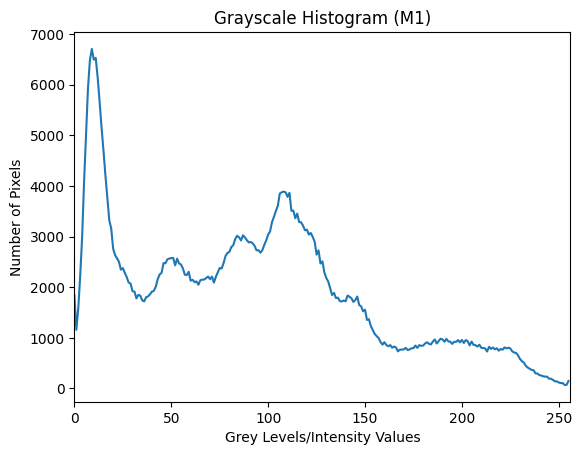

In [4]:
plt.figure()
plt.title("Grayscale Histogram (M1)")
plt.xlabel("Grey Levels/Intensity Values")
plt.ylabel("Number of Pixels")
plt.plot(hist_gray)
plt.xlim([0, 256])
plt.show()

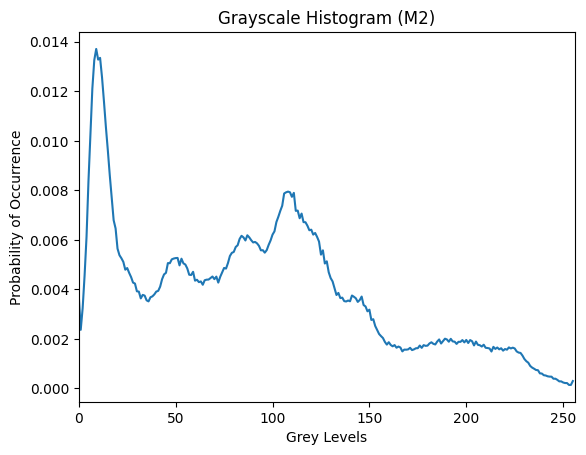

In [5]:
# Normalize the histogram
hist_norm = hist_gray / hist_gray.sum()

plt.figure()
plt.title("Grayscale Histogram (M2)")
plt.xlabel("Grey Levels")
plt.ylabel("Probability of Occurrence")
plt.plot(hist_norm)
plt.xlim([0, 256])
plt.show()

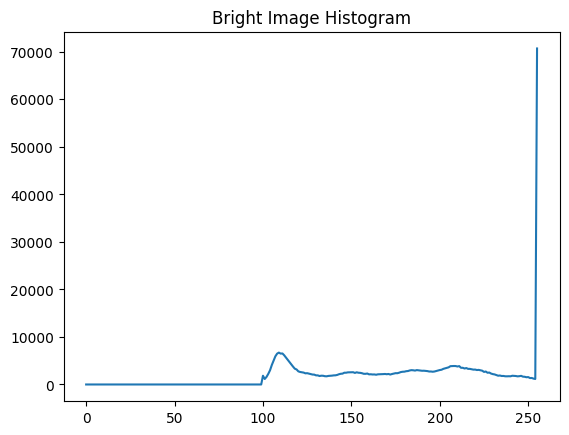

In [6]:
bright_image = cv2.add(image, 100)
hist_bright = cv2.calcHist([bright_image], [0], None, [256], [0, 256])
plt.plot(hist_bright)
plt.title("Bright Image Histogram")
plt.show()

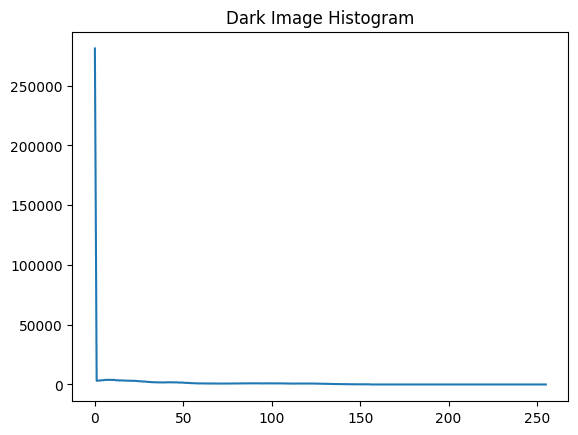

In [7]:
dark_image = cv2.subtract(image, 100)
hist_dark = cv2.calcHist([dark_image], [0], None, [256], [0, 256])
plt.plot(hist_dark)
plt.title("Dark Image Histogram")
plt.show()

Equalize Image


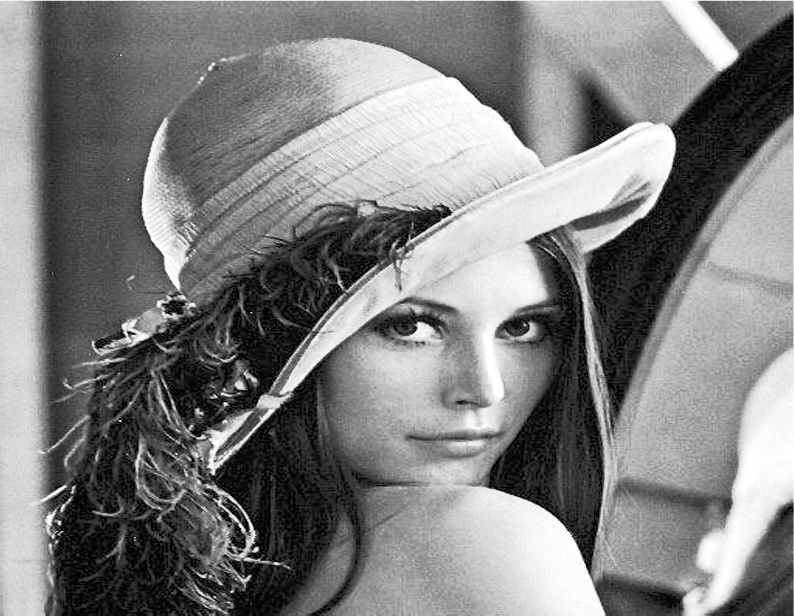

In [11]:
!pip install opencv-python-headless # Install opencv-python-headless

from google.colab.patches import cv2_imshow # Import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt


equalized_image = cv2.equalizeHist(gray_image)
print("Equalize Image")
cv2_imshow(equalized_image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

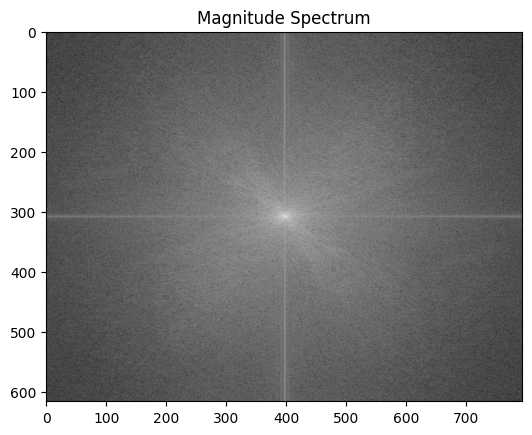

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('SAMPLE.jpg', 0)  # Read as grayscale

# Compute the Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.show()

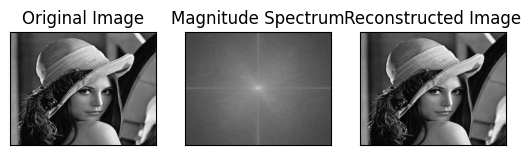

In [14]:
# Compute the Inverse Fourier Transform
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Display the original, magnitude spectrum, and reconstructed images
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back, cmap='gray')
plt.title("Reconstructed Image"), plt.xticks([]), plt.yticks([])
plt.show()

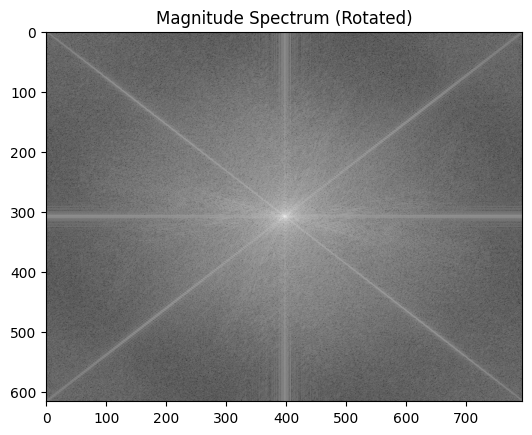

In [15]:
# Rotate the image by 45 degrees
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image, M, (w, h))

# Compute the Fourier Transform of the rotated image
f_rotated = np.fft.fft2(rotated_image)
fshift_rotated = np.fft.fftshift(f_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(fshift_rotated))

# Display the magnitude spectrum of the rotated image
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.title("Magnitude Spectrum (Rotated)")
plt.show()